# Principal Component Analysis with Cancer Data

In [214]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [215]:
Cancerdata = pd.read_csv("breast-cancer-wisconsin-data.csv",)
Cancerdata.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [216]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
Cancerdata.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [217]:
duplicateRowsDF = Cancerdata[Cancerdata.duplicated()]
print(duplicateRowsDF.shape)
Cancerdata.drop_duplicates(keep=False, inplace=True)
#duplicateRowsDF = Cancerdata_DF[Cancerdata_DF.duplicated()]
#print(duplicateRowsDF.shape)
Cancerdata.shape



(8, 11)


(683, 11)

In [218]:
Cancerdata = Cancerdata.drop(['ID'], axis=1)
Cancerdata.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [219]:
print('Shape: ' , Cancerdata.shape)
print('Data Type: ' , Cancerdata.dtypes)

Shape:  (683, 10)
Data Type:  ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [220]:
# We could see "?" values in column, this should be removed from data set
Cancerdata.isna().any()
# Check for missing value in any other column

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [221]:
DF1 = Cancerdata[Cancerdata['Bare Nuclei']=='?']
DF1.shape


(16, 10)

In [222]:
Cancerdata.describe().T


,count,mean,std,min,25%,50%,75%,max
ClumpThickness,683.0,4.436310,2.815953,1.0,2.0,4.0,6.0,10.0
Cell Size,683.0,3.125915,3.030919,1.0,1.0,1.0,5.0,10.0
Cell Shape,683.0,3.194729,2.947513,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.843338,2.877824,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.206442,2.184956,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,683.0,3.433382,2.446411,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,683.0,2.898975,3.079120,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.597365,1.731321,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.688141,0.950825,2.0,2.0,2.0,4.0,4.0


In [223]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
DF1 =(Cancerdata == '?').any()
DF1

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [224]:
Cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


In [225]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [226]:
# Replace using median 
median = Cancerdata['Normal Nucleoli'].median()
Cancerdata = Cancerdata.replace('?' , np.nan)

Cancerdata.fillna(median, inplace=True)

In [227]:
DF2 = Cancerdata[Cancerdata['Bare Nuclei']=='?']
DF2.shape

(0, 10)

In [228]:
Cancerdata.isna().any()

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [229]:
Cancerdata.duplicated(subset=None, keep='first').any()

True

In [232]:
Cancerdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,683.0,4.436310,2.815953,1.0,2.0,4.0,6.0,10.0
Cell Size,683.0,3.125915,3.030919,1.0,1.0,1.0,5.0,10.0
Cell Shape,683.0,3.194729,2.947513,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.843338,2.877824,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.206442,2.184956,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,683.0,3.433382,2.446411,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,683.0,2.898975,3.079120,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.597365,1.731321,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.688141,0.950825,2.0,2.0,2.0,4.0,4.0


# Q4. Perform bi variate analysis including correlation & pairplots. 


In [233]:
Cancerdata.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [234]:
# Check for correlation of variable
Cancerdata.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.641744,0.652925,0.489557,0.512964,0.563792,0.535582,0.350676,0.717911
Cell Size,0.641744,1.000000,0.903901,0.720908,0.742223,0.763451,0.731788,0.461504,0.817538
Cell Shape,0.652925,0.903901,1.000000,0.699192,0.708879,0.741057,0.730159,0.442361,0.816426
Marginal Adhesion,0.489557,0.720908,0.699192,1.000000,0.617739,0.672991,0.601522,0.416689,0.706065
Single Epithelial Cell Size,0.512964,0.742223,0.708879,0.617739,1.000000,0.625126,0.639503,0.486362,0.679651
Normal Nucleoli,0.563792,0.763451,0.741057,0.672991,0.625126,1.000000,0.672310,0.343478,0.756623
Bland Chromatin,0.535582,0.731788,0.730159,0.601522,0.639503,0.672310,1.000000,0.426937,0.718929
Mitoses,0.350676,0.461504,0.442361,0.416689,0.486362,0.343478,0.426937,1.000000,0.425083
Class,0.717911,0.817538,0.816426,0.706065,0.679651,0.756623,0.718929,0.425083,1.000000


In [235]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [236]:
Cancerdata.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [237]:
Cancerdata['Bare Nuclei'] = Cancerdata['Bare Nuclei'].astype('int64')
Cancerdata.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

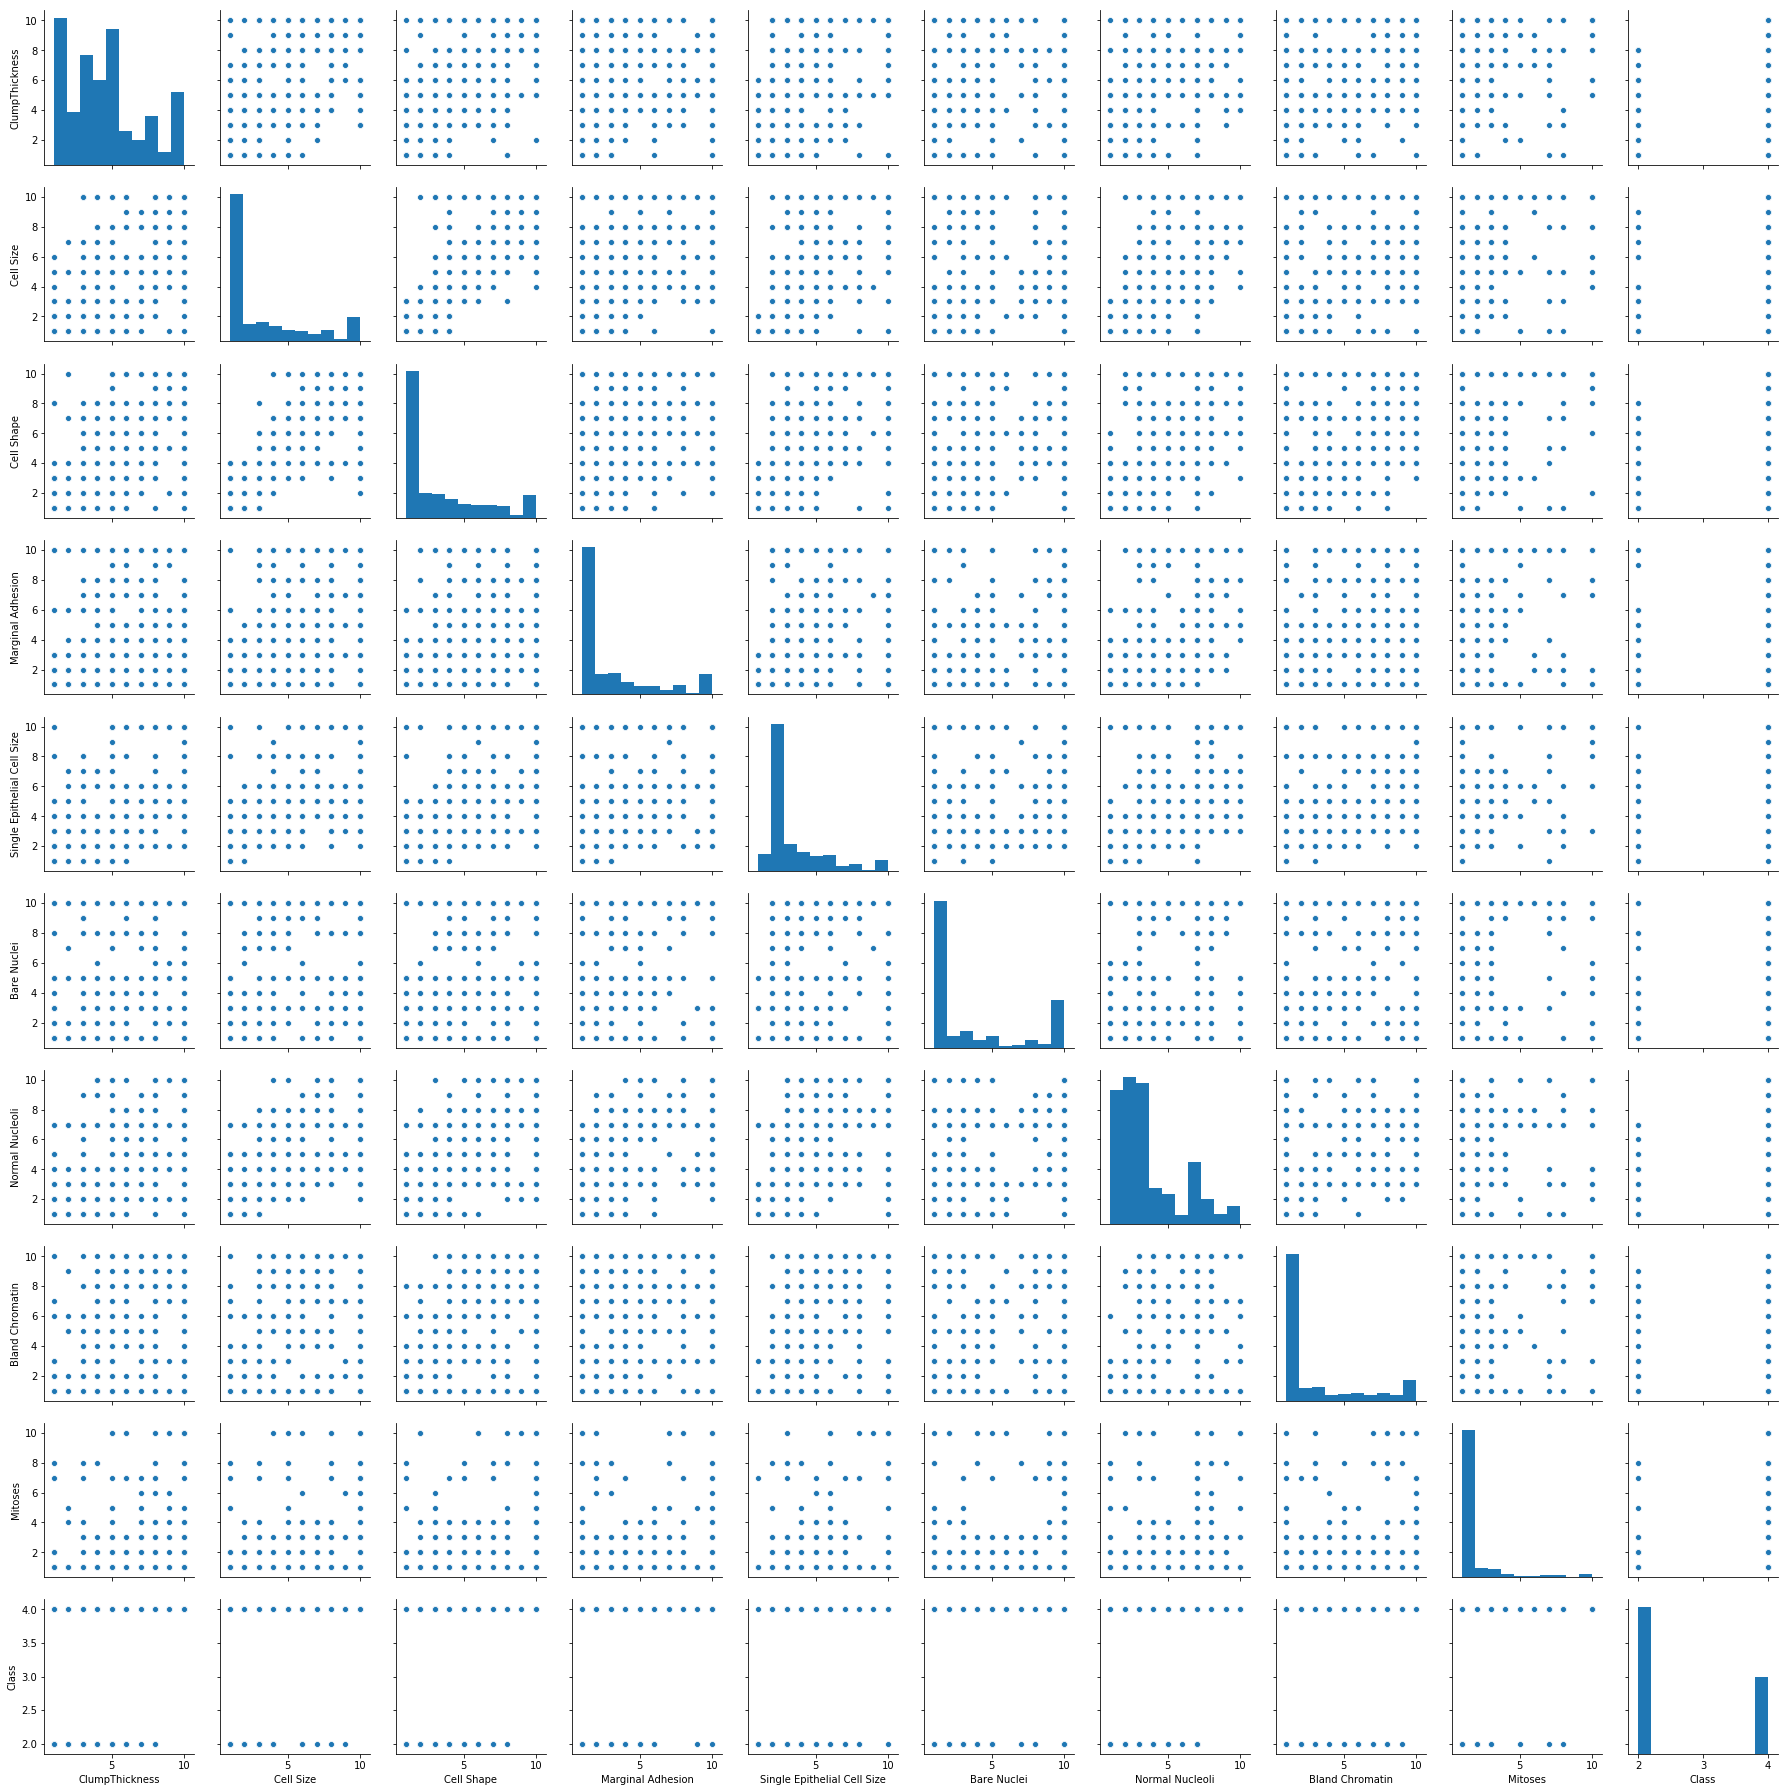

In [238]:
#Let us check for pair plots
sns.pairplot(Cancerdata)

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

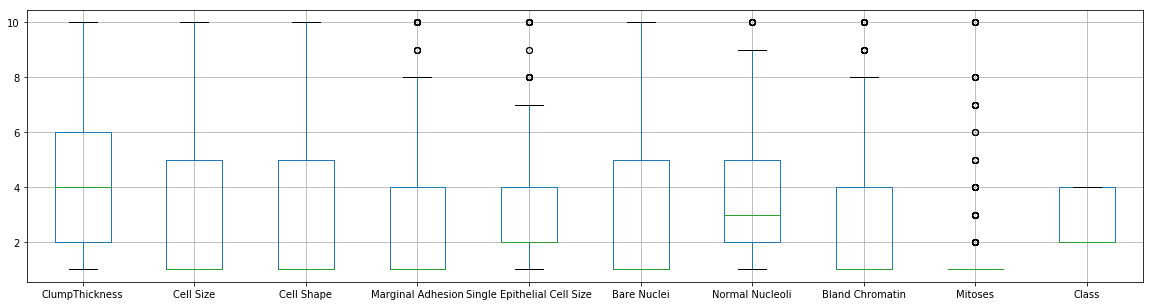

In [239]:
# We could see most of the outliers are now removed.
boxplot = Cancerdata.boxplot(figsize=(20,5))

In [ ]:
df['Marginal Adhesion'] = np.where(df['Marginal Adhesion'] > 5, 5, df['Marginal Adhesion'])

In [240]:
Cancerdata.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [241]:
X = Cancerdata[Cancerdata.columns[0:-1]]
y = Cancerdata["Class"]

In [242]:
X.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [243]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          


C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


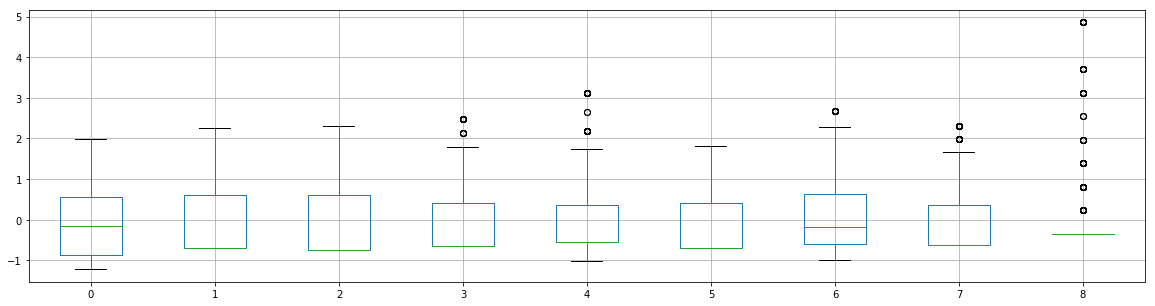

In [244]:

X_std_DF = pd.DataFrame(data=X_std)
boxplot = X_std_DF.boxplot(figsize=(20,5))

In [245]:
Cancerdata.groupby(["Class"]).count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,
2,448,448,448,448,448,448,448,448,448
4,235,235,235,235,235,235,235,235,235


# Q6 Create a covariance matrix for identifying Principal components

In [246]:
# PCA
# Step 1 - Create covariance matrix


In [247]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00146628 0.64268541 0.65388211 0.49027485 0.5137159  0.59087198
  0.56461834 0.53636755 0.35119007]
 [0.64268541 1.00146628 0.90522601 0.72196486 0.74331134 0.68458547
  0.76457068 0.73286069 0.46218096]
 [0.65388211 0.90522601 1.00146628 0.70021741 0.7099183  0.70460115
  0.74214403 0.73122981 0.44300916]
 [0.49027485 0.72196486 0.70021741 1.00146628 0.61864498 0.67865033
  0.67397729 0.60240447 0.4172999 ]
 [0.5137159  0.74331134 0.7099183  0.61864498 1.00146628 0.57698529
  0.62604243 0.64044055 0.48707557]
 [0.59087198 0.68458547 0.70460115 0.67865033 0.57698529 1.00146628
  0.67411262 0.58556864 0.34153619]
 [0.56461834 0.76457068 0.74214403 0.67397729 0.62604243 0.67411262
  1.00146628 0.67329615 0.34398191]
 [0.53636755 0.73286069 0.73122981 0.60240447 0.64044055 0.58556864
  0.67329615 1.00146628 0.42756345]
 [0.35119007 0.46218096 0.44300916 0.4172999  0.48707557 0.34153619
  0.34398191 0.42756345 1.00146628]]


# Q7 Identify eigen values and eigen vector

In [248]:
# Step 2- Get eigen values and eigen vector

In [249]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30114895 -0.14970449  0.87097392  0.00362921 -0.00721396 -0.07561426
   0.29259706  0.13025121  0.14121315]
 [-0.38056561 -0.04638574 -0.04717721  0.73679214 -0.17745909 -0.10304368
  -0.44028723  0.26799252  0.01213555]
 [-0.37692538 -0.08137188  0.01240107 -0.66381699 -0.15723129 -0.04672914
  -0.58684738  0.1889799   0.05908099]
 [-0.33578172 -0.05434138 -0.36731264 -0.04560622  0.49631626 -0.03504892
   0.3090907   0.37419448  0.51398669]
 [-0.33528747  0.18492    -0.19490377 -0.06459552 -0.3008102  -0.73637733
   0.29664023 -0.29266533 -0.06957065]
 [-0.33234082 -0.25164527  0.0415709   0.07179683  0.55993431  0.0334238
  -0.21220289 -0.66447609 -0.13468177]
 [-0.34694747 -0.22920825 -0.1699813  -0.06741849 -0.02537686  0.2534495
   0.32924083  0.27800278 -0.73694398]
 [-0.33726814  0.01648809 -0.13464713  0.02117741 -0.4918073   0.58022896
   0.19198579 -0.36096165  0.34886687]
 [-0.22949199  0.90306895  0.13178491 -0.00837599  0.22555066  0.18968772
  -0.0

In [250]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.921540937993746, array([-0.30114895, -0.38056561, -0.37692538, -0.33578172, -0.33528747,
       -0.33234082, -0.34694747, -0.33726814, -0.22949199])), (0.7795472140556186, array([-0.14970449, -0.04638574, -0.08137188, -0.05434138,  0.18492   ,
       -0.25164527, -0.22920825,  0.01648809,  0.90306895])), (0.5424733628695084, array([ 0.87097392, -0.04717721,  0.01240107, -0.36731264, -0.19490377,
        0.0415709 , -0.1699813 , -0.13464713,  0.13178491])), (0.46331077551436783, array([-0.00721396, -0.17745909, -0.15723129,  0.49631626, -0.3008102 ,
        0.55993431, -0.02537686, -0.4918073 ,  0.22555066])), (0.36095890748049475, array([-0.07561426, -0.10304368, -0.04672914, -0.03504892, -0.73637733,
        0.0334238 ,  0.2534495 ,  0.58022896,  0.18968772])), (0.3033786916188328, array([ 0.13025121,  0.26799252,  0.1889799 ,  0.37419448, -0.29266533,
       -0.66447609,  0.27800278, -0.36096165,  0.02682146])), (0.28768781142041505, array([ 0.14121315,  0.01213555,  0.05908099, 

# Q8 Find variance and cumulative variance by each eigen vector

In [251]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


In [252]:
print('variance: ' ,var_explained )
print('')
print('cumulative variance: ' ,cum_var_exp )

variance:  [0.6569856710121578, 0.08648953961053062, 0.06018656799690982, 0.0514036032049453, 0.04004782412586585, 0.033659389569553264, 0.031918511044204165, 0.02912743193213216, 0.010181461503701129]

cumulative variance:  [0.65698567 0.74347521 0.80366178 0.85506538 0.89511321 0.9287726
 0.96069111 0.98981854 1.        ]


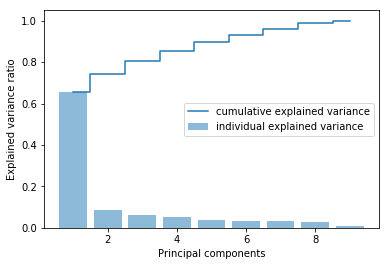

In [253]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [254]:
from sklearn.decomposition import PCA
#X_centered = X - X.mean(axis=0)
pca = PCA(n_components=7)
pca.fit(X_std)
X_pca = pca.transform(X_std)
X_pca.shape

(683, 7)

# Q10 Find correlation between components and features

In [256]:
pca.components_


array([[ 0.30114895,  0.38056561,  0.37692538,  0.33578172,  0.33528747,
         0.33234082,  0.34694747,  0.33726814,  0.22949199],
       [-0.14970449, -0.04638574, -0.08137188, -0.05434138,  0.18492   ,
        -0.25164527, -0.22920825,  0.01648809,  0.90306895],
       [-0.87097392,  0.04717721, -0.01240107,  0.36731264,  0.19490377,
        -0.0415709 ,  0.1699813 ,  0.13464713, -0.13178491],
       [ 0.00721396,  0.17745909,  0.15723129, -0.49631626,  0.3008102 ,
        -0.55993431,  0.02537686,  0.4918073 , -0.22555066],
       [ 0.07561426,  0.10304368,  0.04672914,  0.03504892,  0.73637733,
        -0.0334238 , -0.2534495 , -0.58022896, -0.18968772],
       [-0.13025121, -0.26799252, -0.1889799 , -0.37419448,  0.29266533,
         0.66447609, -0.27800278,  0.36096165, -0.02682146],
       [-0.14121315, -0.01213555, -0.05908099, -0.51398669,  0.06957065,
         0.13468177,  0.73694398, -0.34886687,  0.15641262]])

In [257]:
pca.explained_variance_


array([5.92154094, 0.77954721, 0.54247336, 0.46331078, 0.36095891,
       0.30337869, 0.28768781])

In [258]:
pca.explained_variance_ratio_

array([0.65698567, 0.08648954, 0.06018657, 0.0514036 , 0.04004782,
       0.03365939, 0.03191851])

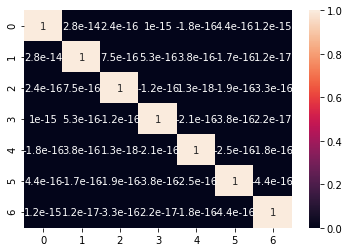

In [259]:
pca_new_df=pd.DataFrame(X_pca)
sns.heatmap(pca_new_df.corr(), annot=True)

C:\Users\Sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


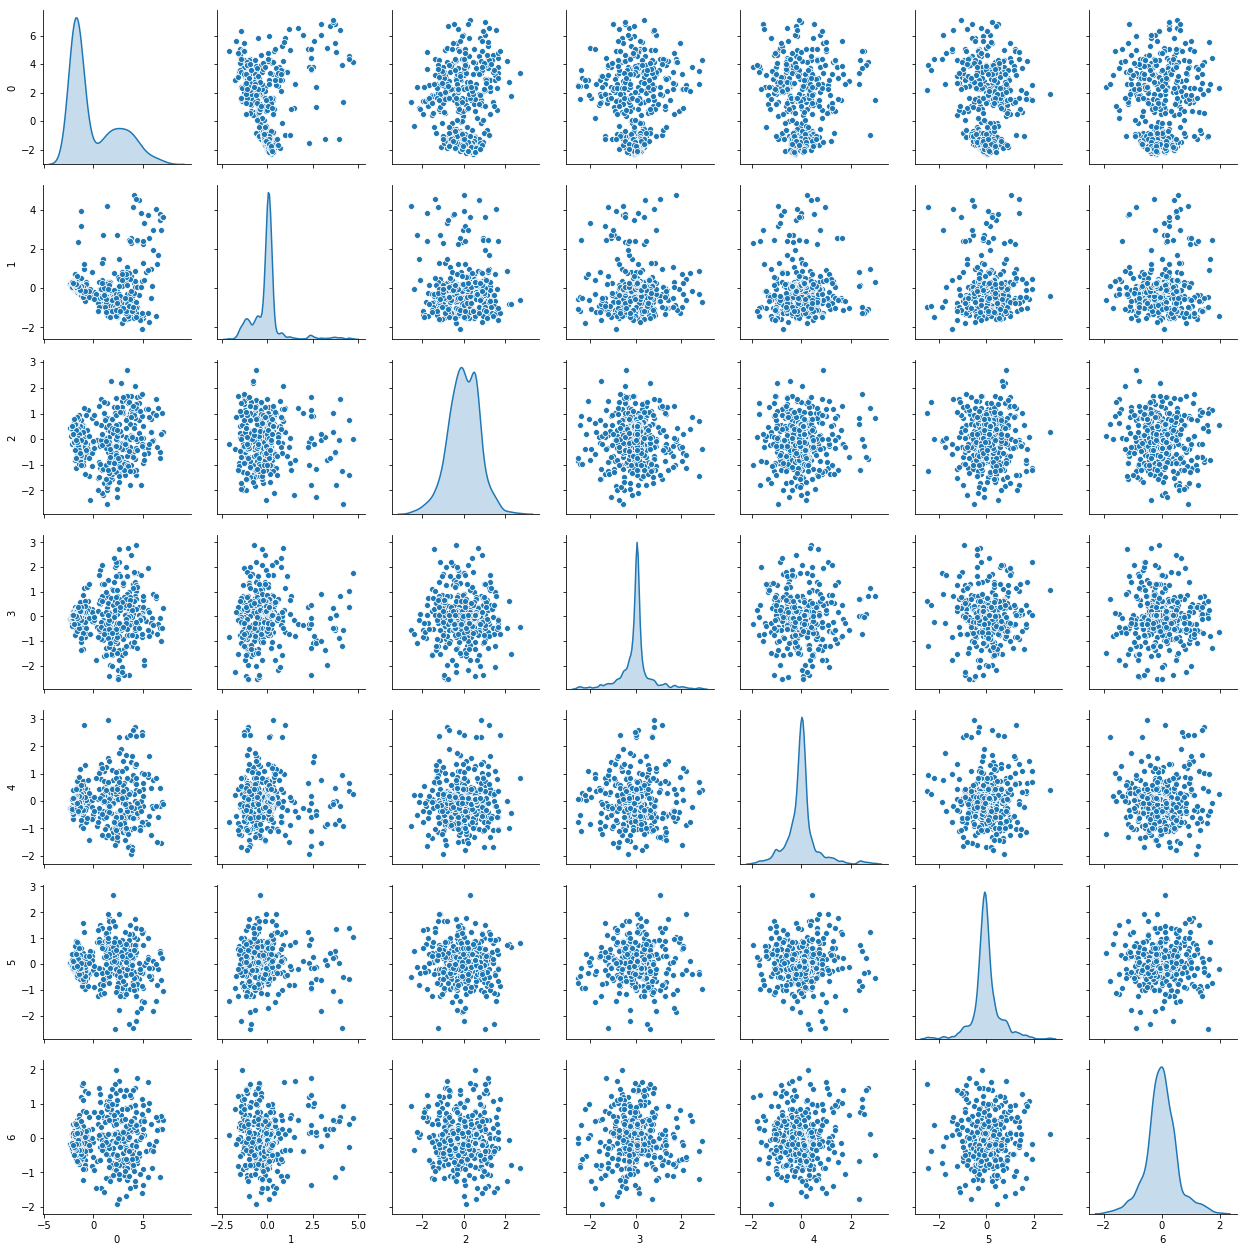

In [260]:
sns.pairplot(pca_new_df, diag_kind='kde')